# Importando o arquivo

In [1]:
import pandas as pd 

df = pd.read_csv('Meteorite-Landings.csv')

df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.789170, 41.504600)"


# Cleaning the data

O arquivo possui uma coluna 'year' que no entanto possui muita informação não relevante.
Vamos substituí-la por uma columa 'Year' apenas com o ano.
Também vamos substituir a coluna 'mass (g)' por uma idêntica mas com nome 'mass' para facilitar a manipulação

In [2]:
df['Year'] = pd.to_datetime(df['year'], format='%d/%m/%Y %I:%M:%S %p', errors='coerce').dt.year



In [3]:
mass_series = df['mass (g)']
df['mass'] = mass_series

cols = df.columns.tolist
cols = ['name', 'id', 'nametype', 'mass', 'recclass', 'fall', 'Year', 'reclat',
       'reclong', 'GeoLocation']
df = df[cols]

Trocar nan por valor numérico : 0

In [4]:
df = df.fillna(0)

Tornar todos os números inteiros em tipo int se possível e reorganizar a tabela

In [11]:
df = df.astype(int, errors='ignore')
df

,name,id,nametype,mass,recclass,fall,Year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,21,L5,Fell,1880,50,6,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,720,H6,Fell,1951,56,10,"(56.183330, 10.233330)"
2,Abee,6,Valid,107000,EH4,Fell,1952,54,-113,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,1914,Acapulcoite,Fell,1976,16,-99,"(16.883330, -99.900000)"
4,Achiras,370,Valid,780,L6,Fell,1902,-33,-64,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,172,Eucrite,Found,1990,29,17,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,46,"Pallasite, ungrouped",Found,1999,13,8,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,3,H4,Found,1939,49,17,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,2167,L6,Found,2003,49,41,"(49.789170, 41.504600)"


# Número de Meteoros por ano de 1970 a 2013

Agora vamos fazer uma simples análise da frequência com que meteoros foram encontrados nos últimos anos.

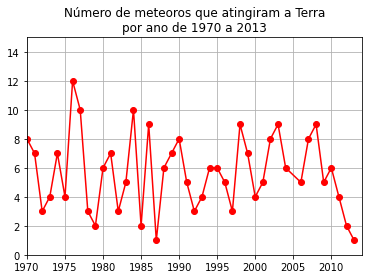

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

fall_df = df[['Year', 'fall']]
fell_df = fall_df[fall_df['fall'] == 'Fell']
years_fell = np.sort(fell_df['Year'].unique())
fell_df = fell_df.groupby('Year').count()
n_fell = fell_df['fall']

plt.title('Número de meteoros que atingiram a Terra\npor ano de 1970 a 2013')
plt.xlim((1970, 2014))
plt.ylim((0, 15))
plt.plot(years_fell, n_fell, 'r-o')
plt.grid()
plt.show()





In [ ]:
#Percebe-se que a quantidade de meteoritos que atingem a Terra é da ordem de 10

In [1]:
fall_df = df[['Year', 'fall']]
found_df = fall_df[fall_df['fall'] == 'Found']
years_found = np.sort(found_df['Year'].unique())
found_df = found_df.groupby('Year').count()
n_found = found_df['fall']
plt.title('Número de meteoritos encontrados entre\n1970 e 2013')
plt.grid()
plt.xlim((1970, 2013))
plt.plot(years_found, n_found, 'g-o')
plt.show()

found_df.loc[1979]

NameError: name 'df' is not defined

In [2]:
#No entanto, o volume de artefatos encontrados é extremamente maior, da ordem de 10^3.

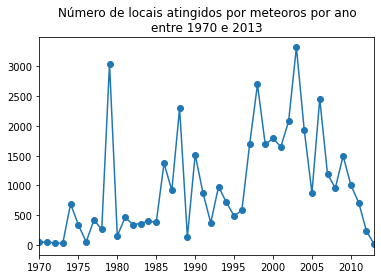

In [12]:
by_year_df = df.groupby(['Year']).count()
by_year_df['n'] = by_year_df['id']
by_year_df.drop(['name', 'id', 'nametype', 'recclass', 'mass', 'reclat', 'reclong', 'GeoLocation'], axis=1, inplace=True)

years = np.sort(df['Year'].unique())
n = by_year_df['n']

plt.xlim((1970, 2013))
plt.plot(years, n, '-o')
plt.title('Número de locais atingidos por meteoros por ano\nentre 1970 e 2013')
plt.show()

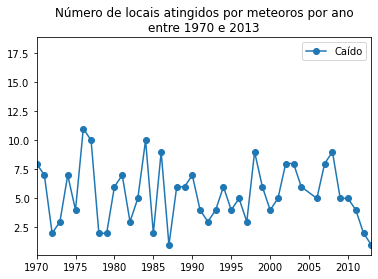

In [63]:


plt.xlim((1970, 2013))
#plt.plot(years, n, '-o', label='Total')
plt.plot(years_fell, n_fell, '-o', label='Caído')
#plt.plot(years_found, n_found, '-o', label='Encontrado')
plt.title('Número de locais atingidos por meteoros por ano\nentre 1970 e 2013')
plt.legend()
plt.show()